In [9]:
import matplotlib.pyplot as plt
import numpy as np
from axes import axes 
import math

plt.rcParams['figure.dpi'] = 200  # 200 e.g. is really fine, but slower



%matplotlib inline
# retina display
%config InlineBackend.figure_format = 'retina'


In [10]:
l=2.5
N=8


In [11]:
def get_cvals(l: float, N: int, n: int) -> np.ndarray:
    """
    Returns the coefficients of the Chebyshev polynomial of the first kind
    of degree N.
    """
    pvals = np.arange(0, N+2)
    cvals = np.sin(np.pi*n*pvals/(N+1))
    return (pvals, cvals)


In [12]:
n=8
N=9
pvals, cc = get_cvals(l, N, n)
pvals = pvals * l
plt.plot(pvals, cc, 'ko', label='n = n')
plt.grid(True)
plt.title("N=%d masses, l=%3.1f cm (total length=%5.1f cm), mode %d" % (N, l, l*(N+1),n))
plt.plot(pvals, cc, 'g-')
plt.gca().set_aspect(1)
plt.xlabel("distance")
plt.ylim(-2.0, 2.0)

xvals = np.linspace(0, (N+1)*l, 1000)
yvals = np.sin(np.pi*n*xvals/l/(N+1))
plt.plot(xvals, yvals, 'r-')

axes()

plt.savefig("n%dN%d.pdf" % (n, N))


In [13]:
class plotter2:
    def __init__(self,  whichmode: int):
        self.whichmode = whichmode
    def __call__(self, t):
        pvals, cvals = get_cvals(2.5, 8, self.whichmode)
        cvals = cvals * math.cos(t)
        line.set_data(pvals, cvals)
        return line,


In [14]:
## Now make an animation
mode3 = plotter2(2)

from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, N+1), 
                ylim =(-1, 1)) 
axis.set_aspect(1)  

# initializing a line variable
line, = axis.plot([], [], 'o-', lw = 3) 
axes()

   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,

# unused in below
def animate(t):
    x = np.linspace(0, 4, 1000)
   
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * t))
    line.set_data(x, y)
      
    return line,
   
anim = FuncAnimation(fig, mode3, init_func = init,
                     frames = 500, interval = 25, blit = True)
  
   
anim.save('anim_beaded_n%dN%d.mp4' % (mode3.whichmode,N), 
          writer = 'ffmpeg', fps = 24)

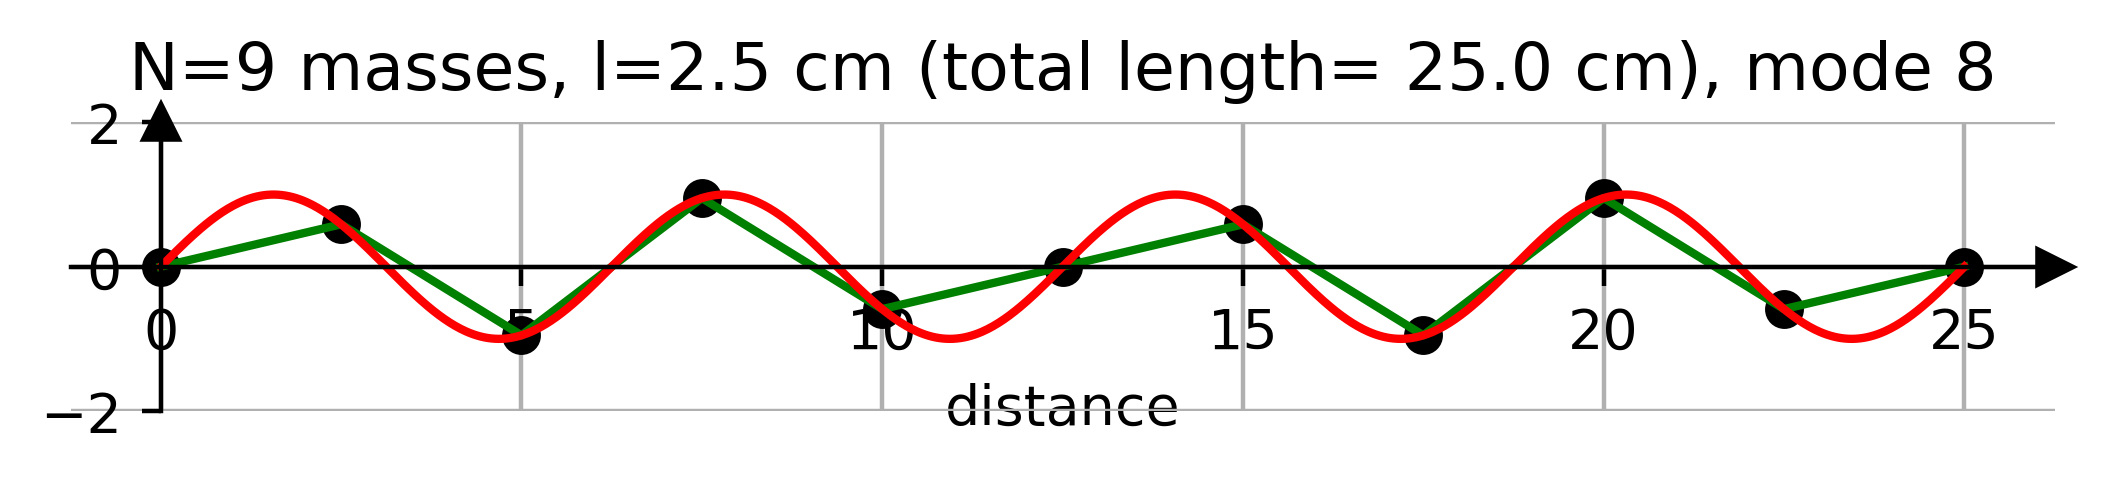

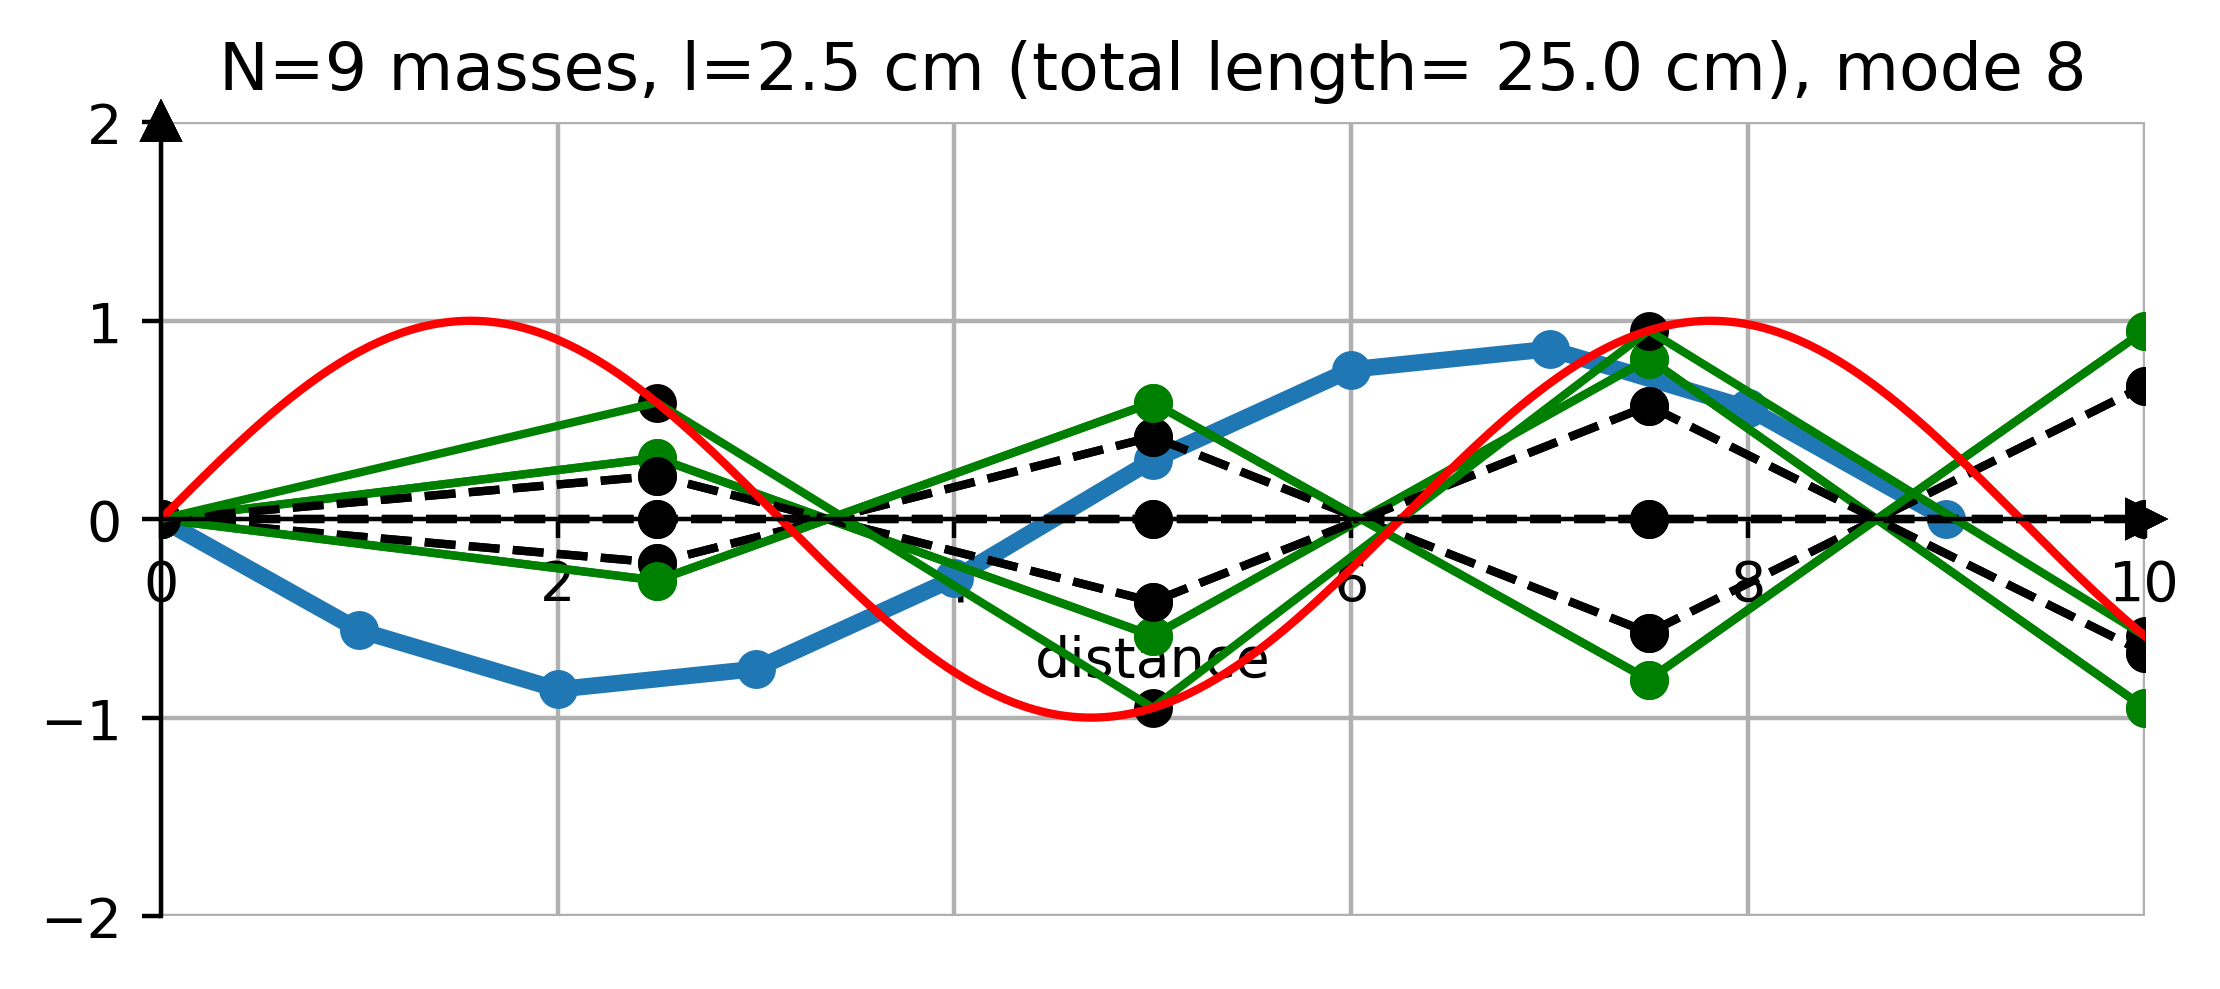

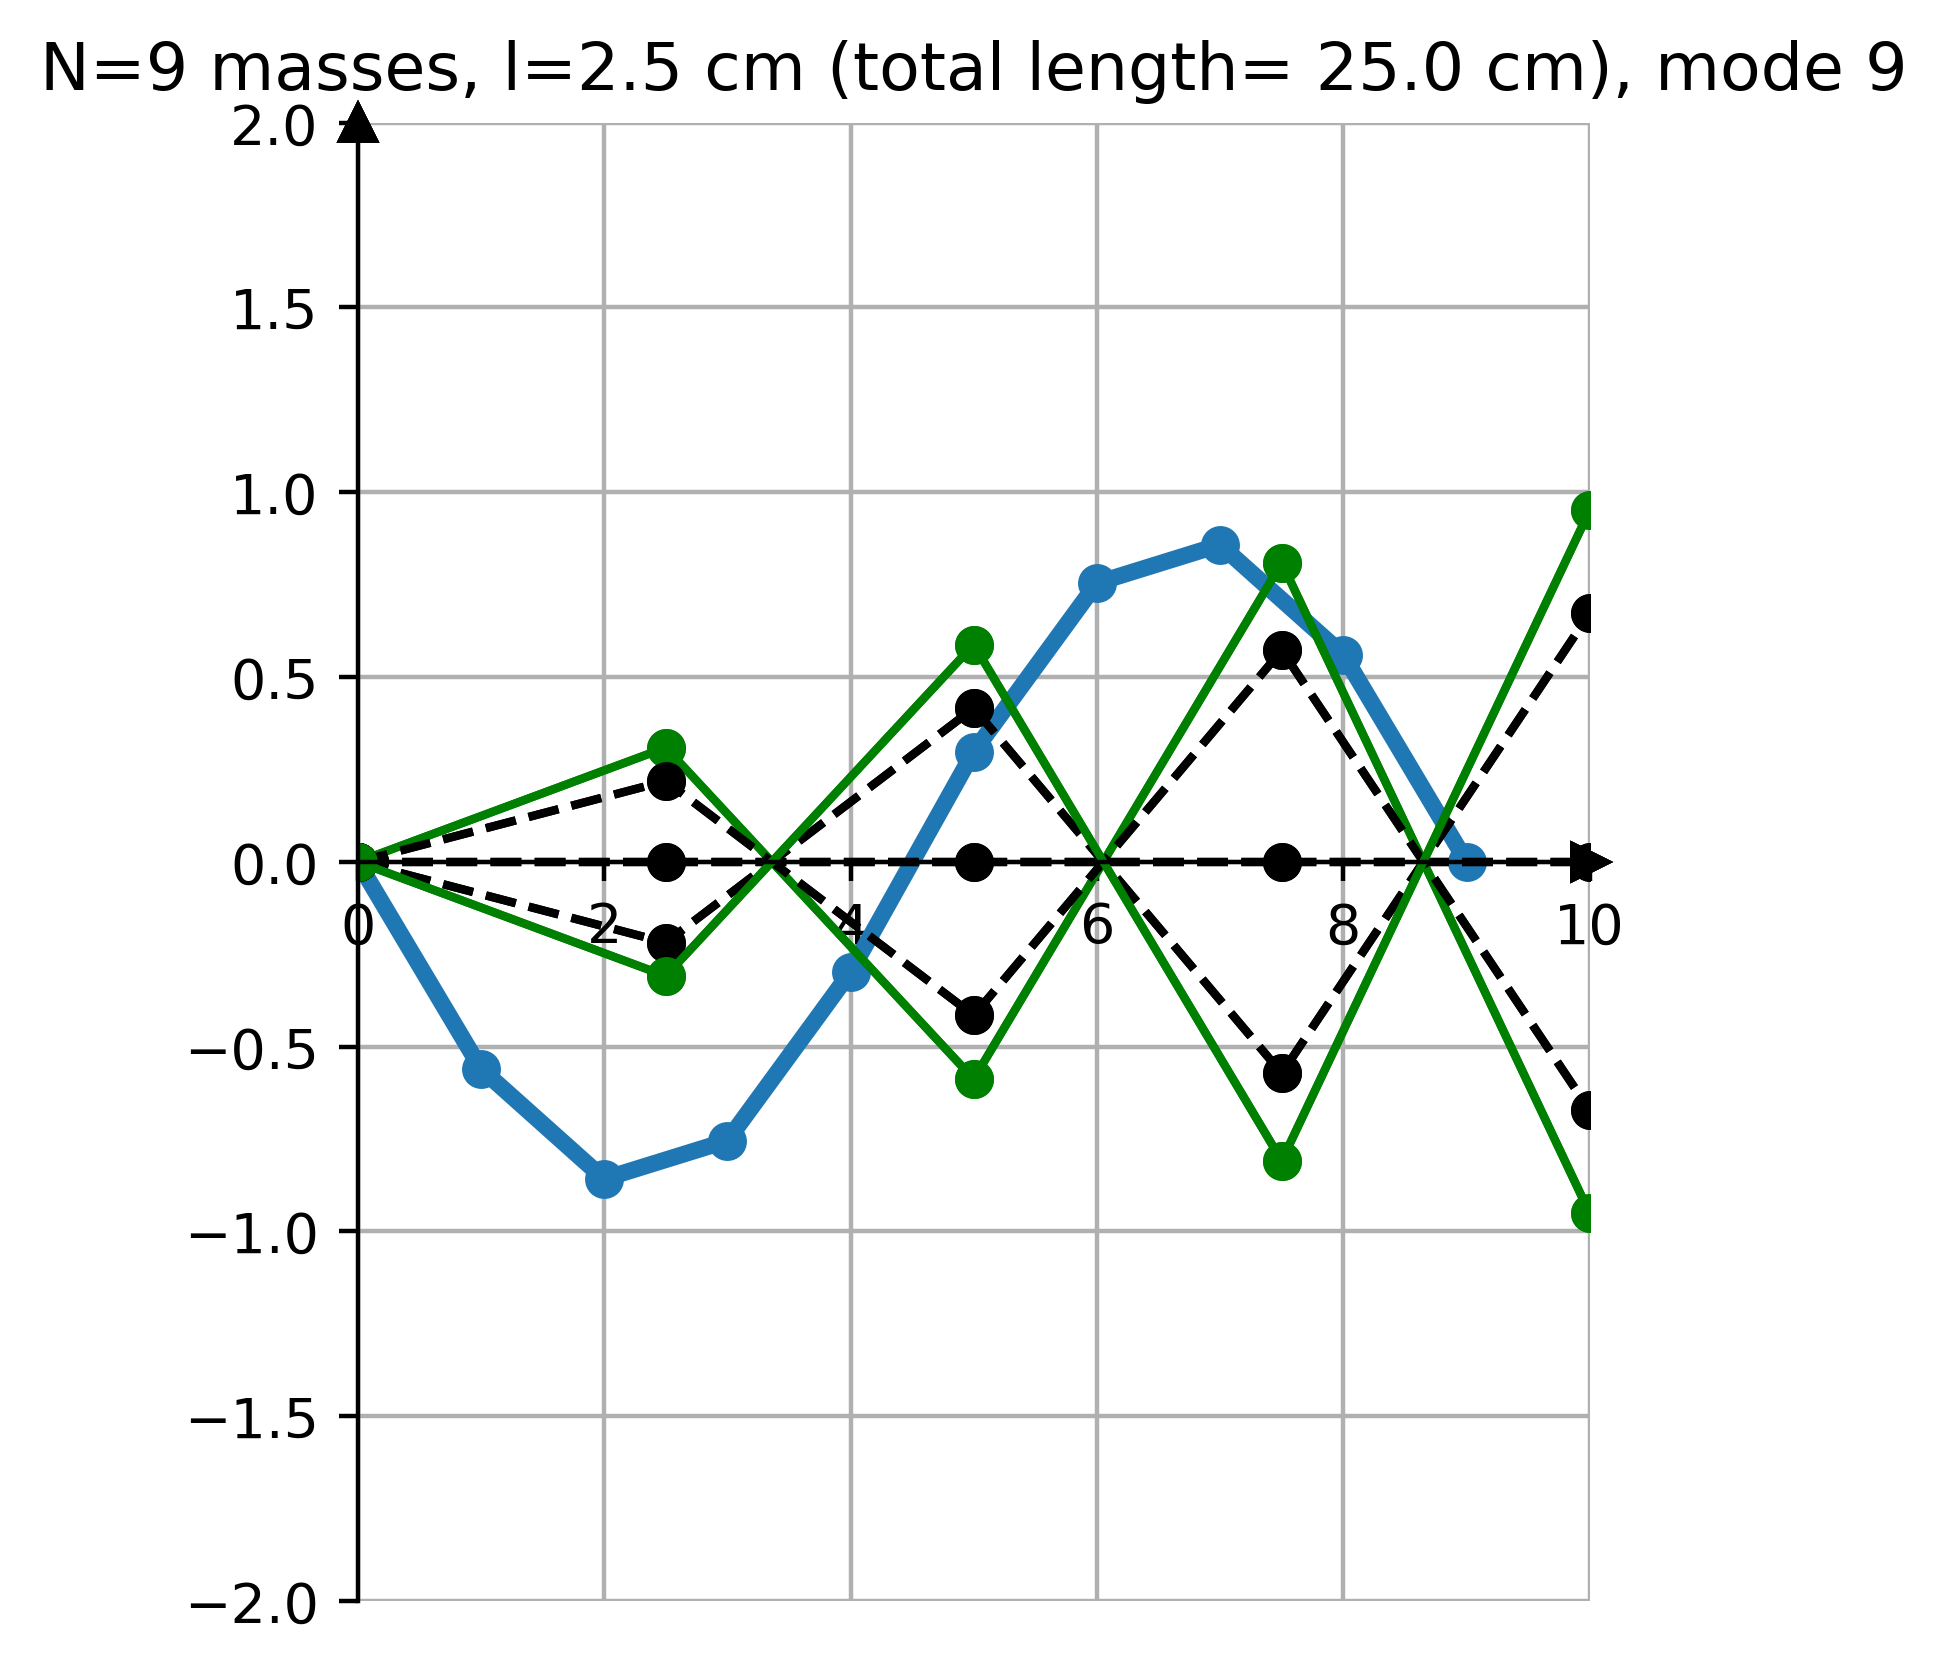

In [16]:
n=9
N=9
pvals, cc = get_cvals(l, N, n)
pvals = pvals * l
plt.grid(True)
plt.title("N=%d masses, l=%3.1f cm (total length=%5.1f cm), mode %d" % (N, l, l*(N+1),n))
plt.plot(pvals, cc, 'go-')
cc2 = cc * math.cos(0.25*math.pi)
plt.plot(pvals, cc2, 'ko--')
cc3 = cc * math.cos(0.5*math.pi)
plt.plot(pvals, cc3, 'ko--')
cc4 = cc * math.cos(0.75*math.pi)
plt.plot(pvals, cc4, 'ko--')

plt.plot(pvals, -cc, 'go-')


plt.gca().set_aspect(3)
#plt.xlabel("distance")
plt.ylim(-2.0, 2.0)


#plt.ylabel("Max Amplitude (cm)")
axes()
plt.show()
plt.savefig("osc_n%dN%d.pdf" % (n, N))
